## 사용할 데이터 셋 : machine.data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#경고창 무시
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/sejinmoon/Desktop/machine.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
df.columns = ['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [4]:
df

,Vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [5]:
#데이터 프레임의 행, 열 길이
print(df.shape)
#데이터 프레임의 통계량
print(df.describe())
#데이터 프레임의 일반정보
print(df.info())

(209, 10)
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
7

In [6]:
#컴프리헨션(문법 깔끔!)
#리스트 컴프리헨션
#인코딩할 열을 따로 분리하기 위해
categorical = [col for col in df.columns if df[col].dtype=='object']

In [7]:
print(categorical)

['Vendor name', 'Model Name']


In [8]:
#이 열의 데이터 중 중복없이 종류를 출력
df[categorical[0]].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [9]:
#각각의 데이터가 몇 개씩 존재하는지 확인
df[categorical[0]].value_counts()

Vendor name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [10]:
#모든 열이 다 다르기에 인코딩의 의미가 없다 -> 해도 정수로 인코딩만 한다.(통계에 영향을 미치지 않는다.)
len(df[categorical[1]].unique())

209

## 시각화

In [11]:
df.columns

Index(['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

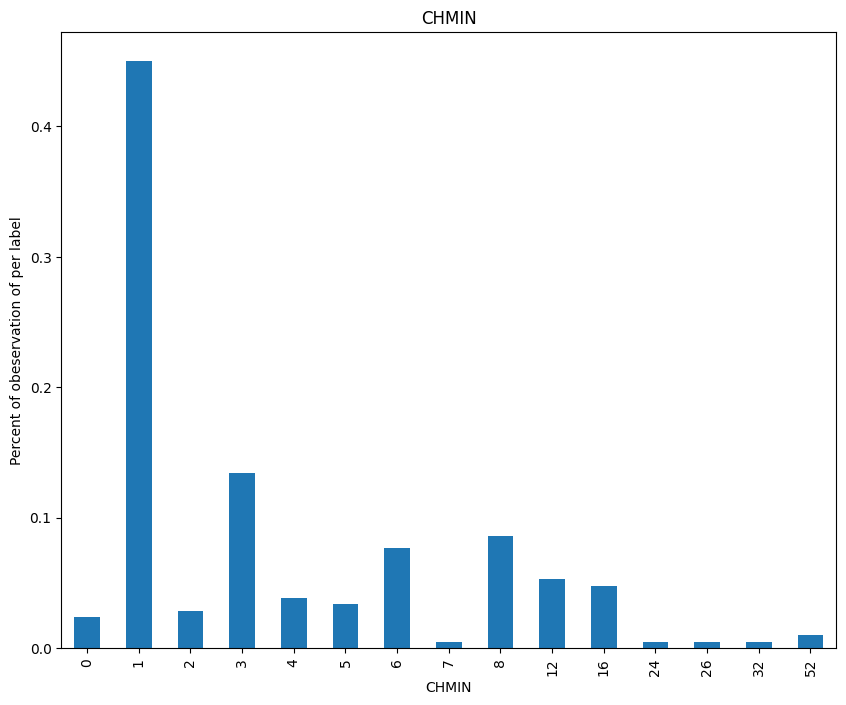

In [12]:
#1. 도화지 준비하기
plt.figure(figsize=(10, 8))

#데이터를 시각화 하는 줄
(df.groupby('CHMIN')['CHMIN'].count()/ len(df)).plot.bar()

plt.ylabel("Percent of obeservation of per label")
plt.title("CHMIN")
plt.show()

In [13]:
#Categorical로 된 열을 버림.
#df.iloc[행,열]
X = df.iloc[:,2:-1]

In [14]:
Y = df.iloc[:,-1]

In [15]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [16]:
Y

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
#스케일 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train

array([[-1.49251242e-01, -6.25121306e-01, -6.03988825e-01, ...,
         2.66363520e-01,  4.26059515e-01, -4.84286378e-01],
       [-6.33012928e-01,  1.15496063e+00,  4.12608516e+00, ...,
         9.39184867e-01,  5.55634315e+00,  4.47311260e+00],
       [-5.21704929e-01,  2.04062160e-01, -4.27936065e-02, ...,
        -5.41022097e-01, -4.28987759e-01, -4.06041073e-01],
       ...,
       [-5.38829237e-01,  2.04062160e-01,  2.77889376e-01, ...,
        -1.37329289e-01, -2.86479880e-01,  8.57865602e-02],
       [-5.08861699e-01,  1.15496063e+00,  2.77889376e-01, ...,
         9.39184867e-01,  1.41043757e-01,  4.09945682e-01],
       [-1.62094472e-01, -2.71387075e-01, -6.84159571e-01, ...,
        -5.41022097e-01, -1.46412204e-03, -5.17820080e-01]])

## 모델링

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
y_predict = lr.predict(X_test)

In [22]:
print(f"기울기 : {lr.coef_}")
print(f"절편 : {lr.intercept_}")

기울기 : [ 10.39400144  25.06705011  46.91644956   5.55195614  -1.0260681
   8.5722561  103.50148573]
절편 : 109.32191780821918


In [23]:
from sklearn.metrics import r2_score

#0.7보다 높으면 분포를 잘 표현하고 있는 것이다.
print(f"R2_score : {r2_score(Y_test, y_predict)}")

R2_score : -0.23003285328716294


In [24]:
print(len(Y_train))
print(len(Y_test))

146
63
